# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711515s

## ZAPOSLENE OSEBE PO VIŠINI NETO PLAČE PO DEJAVNOSTIH IN SPOLU

In [3]:
import warnings
warnings.simplefilter("ignore", category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

# Import the .csv file with ';' as the delimiter
neto_placa = pd.read_csv("../../podatki/placa/neto_placa.csv", sep=";")

# Replace 'z' and '-' with NaN values
neto_placa.iloc[:, 3:] = neto_placa.iloc[:, 3:].replace(['z', '-'], pd.np.nan)

# Convert column names to uppercase
neto_placa.columns = neto_placa.columns.str.upper()

# Convert rows to uppercase
neto_placa['SKD DEJAVNOST'] = neto_placa['SKD DEJAVNOST'].str.upper()
neto_placa['SPOL'] = neto_placa['SPOL'].str.upper()
neto_placa['STATUS ZAPOSLITVE'] = neto_placa['STATUS ZAPOSLITVE'].str.upper()

# Instantiate KNNImputer with 5 neighbors
imputer = KNNImputer(n_neighbors=5)

# Apply KNNImputer to replace missing values
neto_placa.iloc[:, 4:] = imputer.fit_transform(neto_placa.iloc[:, 4:]).astype(int)

# Continue with your analysis or visualization code

In [18]:
# Shranimo v .xlsx datoteko
#neto_placa.to_excel('neto_placa.xlsx', index=False)

In [4]:
# Pregled vseh stolpcev
print(neto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


In [19]:
# Skupno število zaposlenih po plačnih razredih za vsako dejavnost
employment_by_class = neto_placa.groupby('SKD DEJAVNOST').sum().iloc[:, 6:]

# Največje število zaposlenih v posameznem plačnem razredu za vsako dejavnost
max_employment_class = employment_by_class.idxmax(axis=1)

# Izpis rezultatov
for i, activity in enumerate(max_employment_class.index):
    max_class = max_employment_class[i]
    print(f"Največ zaposlenih v dejavnosti '{activity}' je v plačnem razredu {max_class}.")

Največ zaposlenih v dejavnosti 'A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO' je v plačnem razredu 6.
Največ zaposlenih v dejavnosti 'B RUDARSTVO' je v plačnem razredu 18.
Največ zaposlenih v dejavnosti 'C PREDELOVALNE DEJAVNOSTI' je v plačnem razredu 7.
Največ zaposlenih v dejavnosti 'D OSKRBA Z ELEKTRICNO ENERGIJO, PLINOM IN PARO' je v plačnem razredu 19.
Največ zaposlenih v dejavnosti 'E OSKRBA Z VODO, RAVNANJE Z ODPLAKAMI IN ODPADKI, SANIRANJE OKOLJA' je v plačnem razredu 9.
Največ zaposlenih v dejavnosti 'F GRADBENISTVO' je v plačnem razredu 5.
Največ zaposlenih v dejavnosti 'H PROMET IN SKLADISCENJE' je v plačnem razredu 10.
Največ zaposlenih v dejavnosti 'I GOSTINSTVO' je v plačnem razredu 5.
Največ zaposlenih v dejavnosti 'J INFORMACIJSKE IN KOMUNIKACIJSKE DEJAVNOSTI' je v plačnem razredu 19.
Največ zaposlenih v dejavnosti 'K FINANCNE IN ZAVAROVALNISKE DEJAVNOSTI' je v plačnem razredu 20.
Največ zaposlenih v dejavnosti 'L POSLOVANJE Z NEPREMICNINAMI' je v plačnem razredu 14.
Najve

In [21]:
unique_classes = employment_by_class.nunique(axis=1)

most_diverse_activity = unique_classes.idxmax()
diversity_count = unique_classes[most_diverse_activity]

print(f"Aktivnost z največ različnimi plačnimi razredi je: '{most_diverse_activity}' "
      f"z {diversity_count} različnimi plačilnimi razredi.")

Aktivnost z največ različnimi plačnimi razredi je: 'A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO' z 16 različnimi plačilnimi razredi.


In [1]:
import matplotlib.pyplot as plt


activity_data = neto_placa.loc[(neto_placa['SKD DEJAVNOST'] == 'C PREDELOVALNE DEJAVNOSTI') & (neto_placa['SPOL'] == 'SPOL - SKUPAJ')].copy()

pay_classes = activity_data.columns[6:-1]  # Exclude the 'RAZRED NETO - SKUPAJ' column

activity_data['Total'] = activity_data[pay_classes].sum(axis=1)

plt.style.use('ggplot')

activity_data.plot(x='LETO', y=pay_classes, kind='bar', stacked=True, figsize=(12, 6))


plt.xlabel('Leto')
plt.ylabel('Število ljudi')
plt.title('Število ljudi v plačilnem razredu za dejavnost - A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO (SPOL - SKUPAJ)')

plt.legend(title='Pay Class', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)


plt.show()

NameError: name 'neto_placa' is not defined

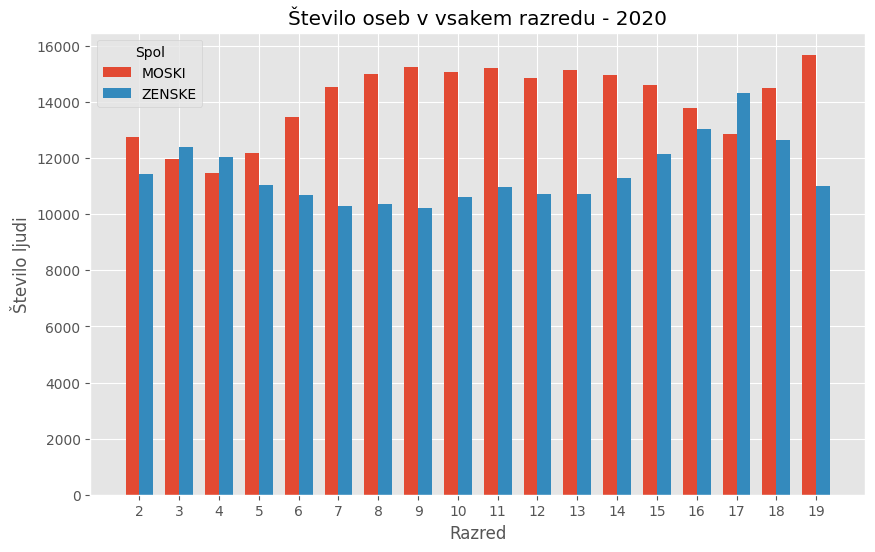

In [23]:
import matplotlib.pyplot as plt
import numpy as np


year_data = neto_placa[neto_placa['LETO'] == 2020]


pay_classes = year_data.columns[6:-1]

# Exclude the 'SPOL - SKUPAJ' row
gender_data = year_data[year_data['SPOL'] != 'ZAPOSLENI - SKUPAJ']

# Group the data by gender and calculate the sum of people in each pay class
grouped_data = gender_data.groupby('SPOL')[pay_classes].sum()

# Set the bar width
bar_width = 0.35

# Set the x-axis positions
x = np.arange(len(pay_classes))

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bars for each gender
plt.bar(x - bar_width/2, grouped_data.loc['MOSKI'], width=bar_width, label='MOSKI')
plt.bar(x + bar_width/2, grouped_data.loc['ZENSKE'], width=bar_width, label='ZENSKE')

# Set the axis labels and title
plt.xlabel('Razred')
plt.ylabel('Število ljudi')
plt.title('Število oseb v vsakem razredu - 2020')

# Set the tick labels
plt.xticks(x, pay_classes)

# Show the legend
plt.legend(title='Spol')

# Display the plot
plt.show()



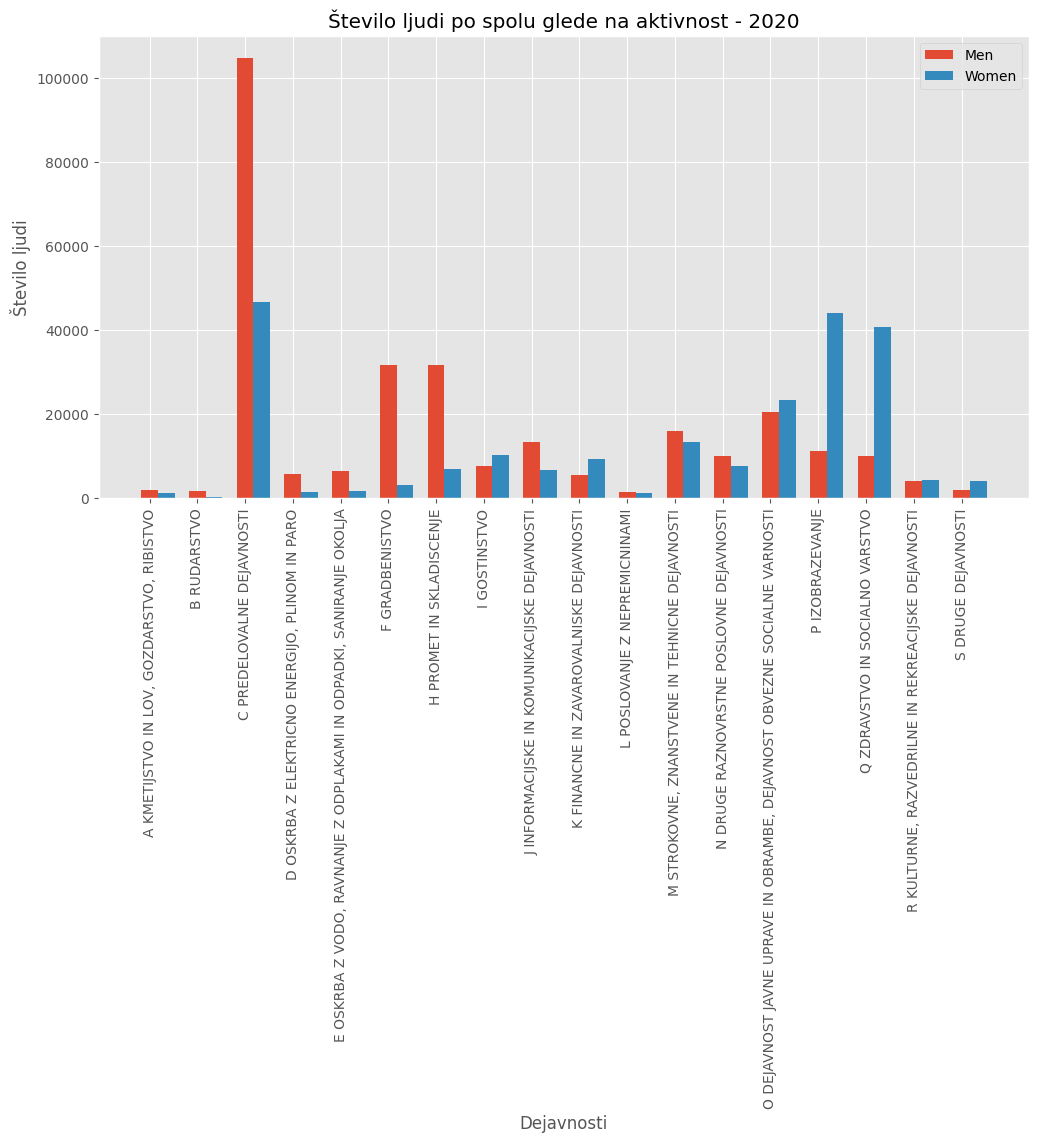

In [24]:
import matplotlib.pyplot as plt


data_2020 = neto_placa[neto_placa['LETO'] == 2020]


activity_gender_sum = data_2020.groupby(['SKD DEJAVNOST', 'SPOL'])['RAZRED NETO - SKUPAJ'].sum().unstack()


activities = activity_gender_sum.index
genders = activity_gender_sum.columns


plt.figure(figsize=(12, 6))


bar_width = 0.35


x = range(len(activities))


plt.bar(x, activity_gender_sum['MOSKI'], width=bar_width, label='Men')
plt.bar([val + bar_width for val in x], activity_gender_sum['ZENSKE'], width=bar_width, label='Women')

plt.xlabel('Dejavnosti')
plt.ylabel('Število ljudi')
plt.title('Število ljudi po spolu glede na aktivnost - 2020')


plt.xticks(range(len(activities)), activities, rotation=90)

plt.legend()

plt.show()

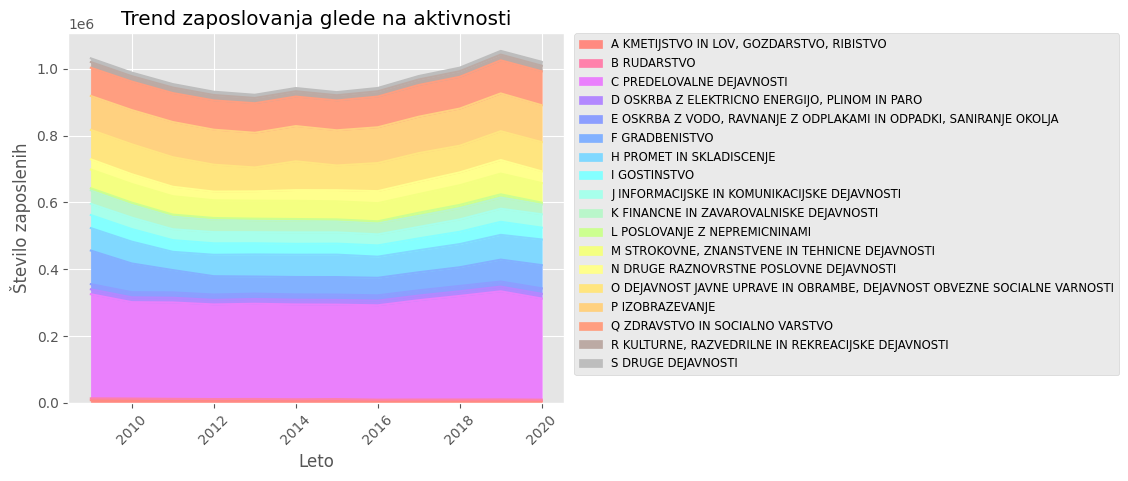

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate the duplicate values by taking the sum
neto_placa_sum = neto_placa.groupby(['LETO', 'SKD DEJAVNOST']).sum().reset_index()

# Pivot the DataFrame to reshape the data for the area plot
pivot_df = neto_placa_sum.pivot(index='LETO', columns='SKD DEJAVNOST', values='RAZRED NETO - SKUPAJ')

# Define a list of unique colors with lighter and more transparent shades
colors = ['#FF8A80', '#FF80AB', '#EA80FC', '#B388FF', '#8C9EFF',
          '#82B1FF', '#80D8FF', '#84FFFF', '#A7FFEB', '#B9F6CA',
          '#CCFF90', '#F4FF81', '#FFFF8D', '#FFE57F', '#FFD180',
          '#FF9E80', '#BCAAA4', '#BDBDBD', '#90A4AE', '#CFD8DC']

# Plot the area plot with unique colors
pivot_df.plot(kind='area', stacked=True, color=colors)

plt.xlabel('Leto')
plt.ylabel('Število zaposlenih')
plt.title('Trend zaposlovanja glede na aktivnosti')
plt.xticks(rotation=45)

# Move the legend to the top right corner
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0, fontsize='small')

plt.grid(True)
plt.show()



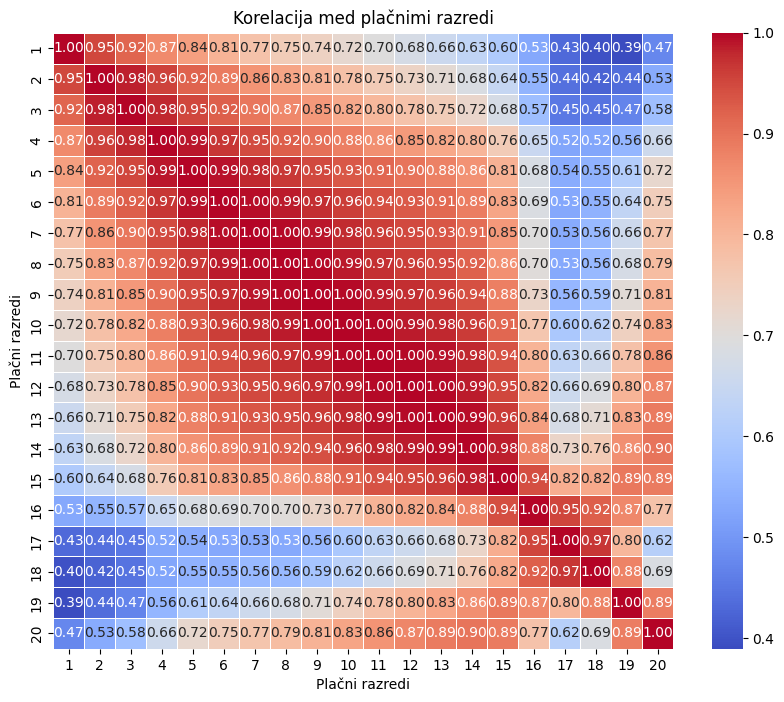

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pay_classes = neto_placa.iloc[:, 5:25]

correlation_matrix = pay_classes.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Korelacija med plačnimi razredi')
plt.xlabel('Plačni razredi')
plt.ylabel('Plačni razredi')
plt.show()


Testiranje če lahko s podanimi podatki naredimo predikcijo za naslednjih 5 let

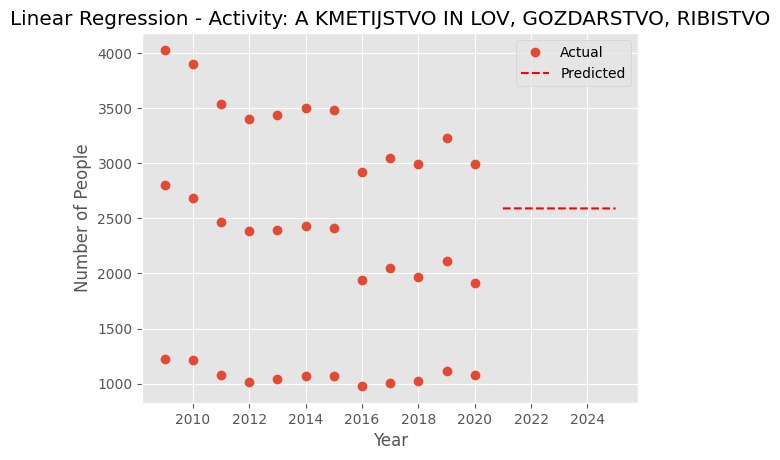

In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np


selected_activity = 'A KMETIJSTVO IN LOV, GOZDARSTVO, RIBISTVO'

activity_data = neto_placa[neto_placa['SKD DEJAVNOST'] == selected_activity]


X = activity_data['LETO'].values.reshape(-1, 1)
y = activity_data['RAZRED NETO - SKUPAJ'].values


train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


model = LinearRegression()
model.fit(X_train, y_train)


next_years = np.arange(max(X) + 1, max(X) + 6).reshape(-1, 1)
predictions = model.predict(next_years)


plt.plot(X, y, 'o', label='Actual')
plt.plot(next_years, predictions, 'r--', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.title('Linear Regression - Activity: ' + selected_activity)
plt.legend()
plt.show()

---

# Povezava do vira podatkovne zbirke: https://podatki.gov.si/dataset/surs0711510s

## ZAPOSLENE OSEBE PO VIŠINI BRUTO PLAČE PO DEJAVNOSTIH IN SPOLU

In [4]:
# OPOMBE:
# Najprej smo opravili osnovno transformacijo podatkov s pomočjo programa PX-Win
# (izbor podatkov, transformacijo vrstic in stolpcev)
# Datoteko smo shranili kot .csv, ki ima podatke ločene z ';'
# V Excelu smo šumnike nadomestili s sprejemljivimi inačicami (Š - S, Č - C, Ž - Z)

# Uvozimo .csv datoteko, ki za delimiter uporablja ';'
bruto_placa = pd.read_csv("../../podatki/placa/bruto_placa.csv", sep = ";")

# V naši podatkovni zbirki vrednost 'z' in '-' predstavlja manjkajoči podatek - nadomestimo jih z NaN vrednostjo, ki jo bomo
# ustrezno nadomestili z uporabo strojnega učenja
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('z', pd.np.nan)
bruto_placa.iloc[:, 3:] = bruto_placa.iloc[:, 3:].replace('-', pd.np.nan)

# Pretvorimo imena stolpcev v velike črke
bruto_placa.columns = bruto_placa.columns.str.upper()

# Pretvorimo vrstice v velike črke
bruto_placa['SKD DEJAVNOST'] = bruto_placa['SKD DEJAVNOST'].apply(lambda x: x.upper())
bruto_placa['SPOL'] = bruto_placa['SPOL'].apply(lambda x: x.upper())
bruto_placa['STATUS ZAPOSLITVE'] = bruto_placa['STATUS ZAPOSLITVE'].apply(lambda x: x.upper())

# Izberemo 5 najbljižjih sosedov
imputer = KNNImputer(n_neighbors=5)

# Nad vsakim stolpec uporabimo KNNImputer, da nadomestimo manjkajoče vrednosti z napovedjo
bruto_placa.iloc[:, 4:] = imputer.fit_transform(bruto_placa.iloc[:, 4:])

# Prve tri stolpce pretvorimo v 'STRING'
bruto_placa.iloc[:, 0:3] = bruto_placa.iloc[:, 0:3].astype(str)
# Preostale stolpce pretvorimo v 'INTEGER'
bruto_placa.iloc[:, 4:] = bruto_placa.iloc[:, 4:].astype(int)

In [5]:
# Shranimo v .xlsx datoteko
# bruto_placa.to_excel('bruto_placa.xlsx', index=False)

In [6]:
# Pregled vseh stolpcev
print(bruto_placa.columns)

Index(['SKD DEJAVNOST', 'SPOL', 'STATUS ZAPOSLITVE', 'LETO',
       'RAZRED NETO - SKUPAJ', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')


---